In [1]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.1/755.1 kB 7.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [2]:
from pathlib import Path
import matplotlib.pyplot as plt
import cv2
import numpy as np
from ultralytics import YOLO

In [3]:
from ultralytics import YOLO

model = YOLO('yolov8n-seg.pt')

100%|██████████| 6.73M/6.73M [00:00<00:00, 90.3MB/s]



image 1/3 /content/drive/MyDrive/test/18015-MC20BluInfinito-scaled-e1707920217641.jpg: 384x640 1 car, 310.0ms
image 2/3 /content/drive/MyDrive/test/apples-101-about-1440x810.jpg: 384x640 1 bowl, 10 apples, 314.7ms
image 3/3 /content/drive/MyDrive/test/unnamed.jpg: 640x640 1 person, 1 cell phone, 316.1ms
Speed: 4.8ms preprocess, 313.6ms inference, 14.7ms postprocess per image at shape (1, 3, 640, 640)


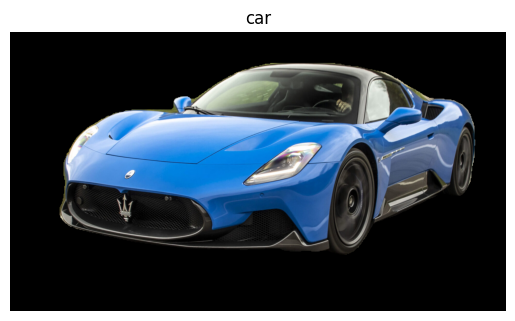

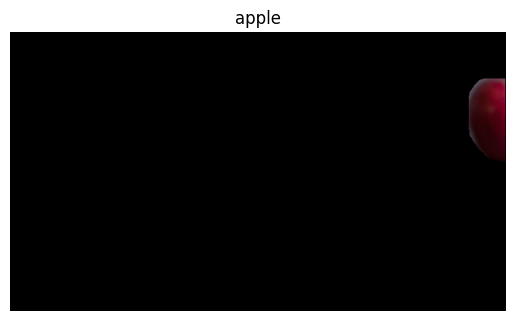

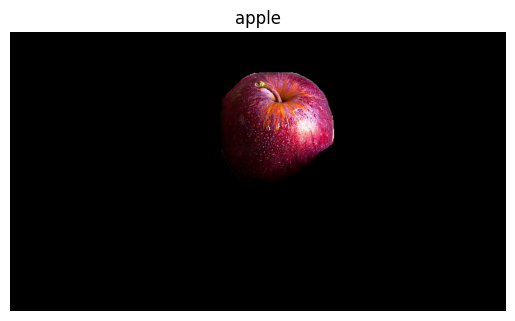

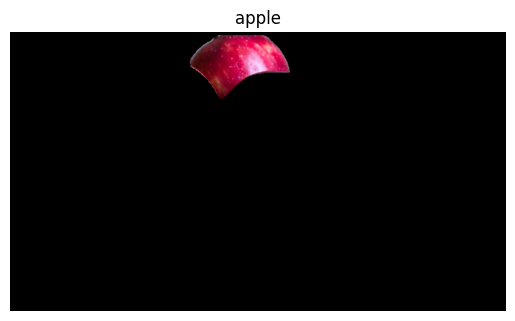

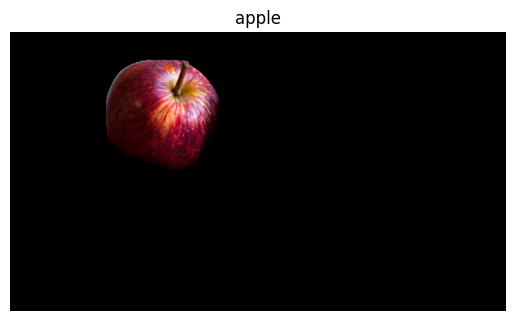

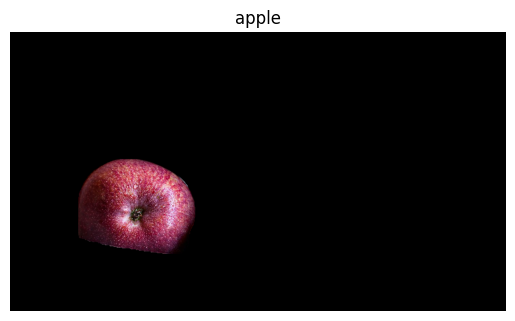

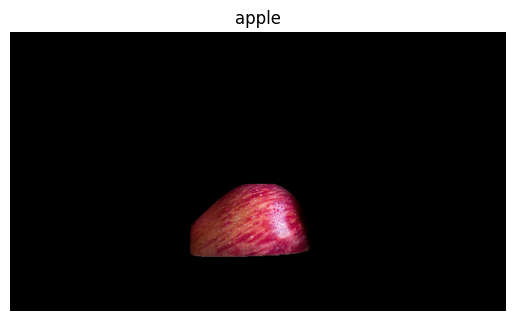

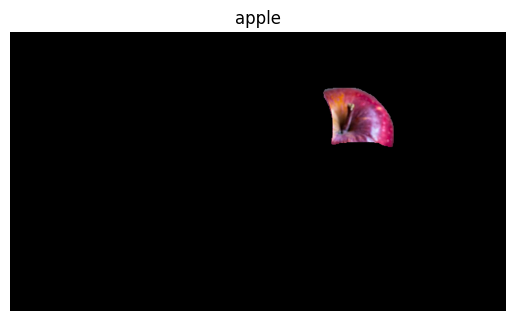

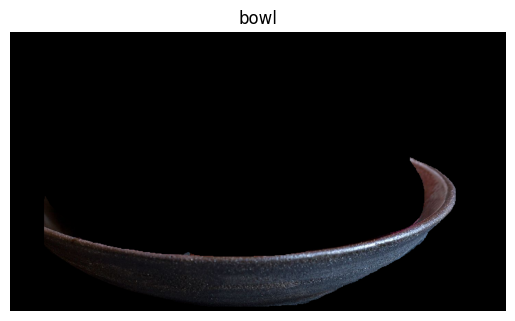

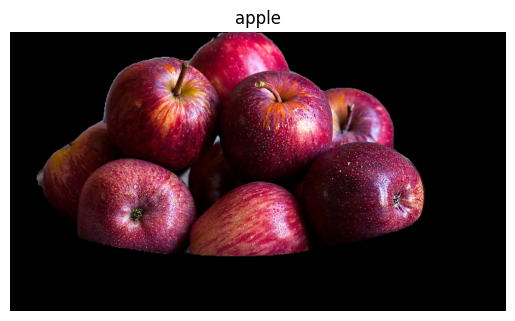

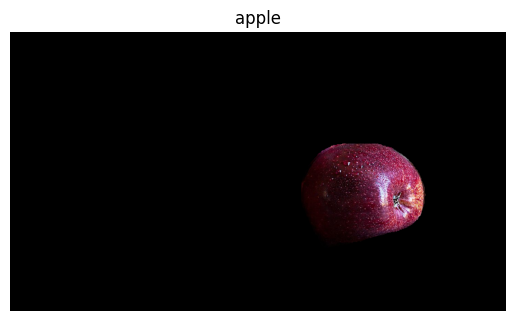

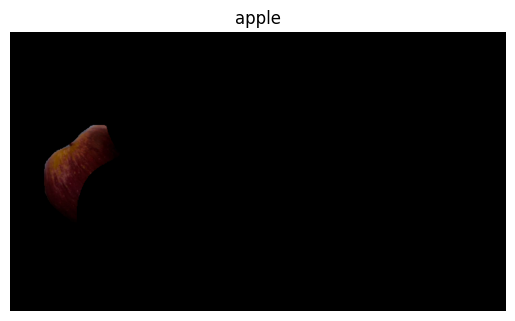

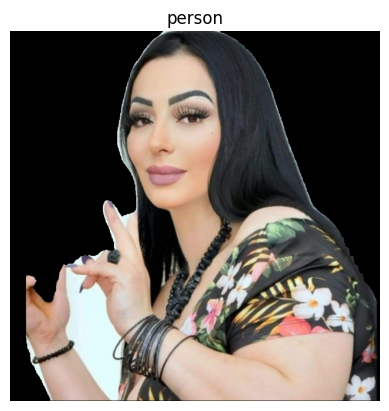

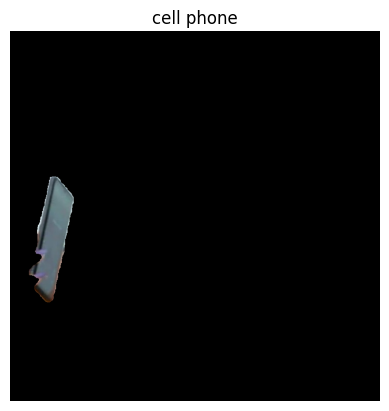

In [25]:
results = model.predict(source='/content/drive/MyDrive/test')

# iterate detection results (helpful for multiple images)
for r in results:
    img = np.copy(r.orig_img)
    img_name = Path(r.path).stem # source image base-name

    # Iterate each object contour (multiple detections)
    for ci,c in enumerate(r):

        # Get detection class name
        label = c.names[c.boxes.cls.tolist().pop()]

        # Create binary mask
        b_mask = np.zeros(img.shape[:2], np.uint8)

        # Extract contour result
        contour = c.masks.xy.pop().astype(np.int32).reshape(-1, 1, 2)

        # Draw contour onto mask
        _ = cv2.drawContours(b_mask, [contour], -1, (255, 255, 255), cv2.FILLED)

        # Isolate object with black background
        mask3ch = cv2.cvtColor(b_mask, cv2.COLOR_GRAY2BGR)
        isolated = cv2.bitwise_and(mask3ch, img)

        # Visualize isolated object
        plt.imshow(cv2.cvtColor(isolated, cv2.COLOR_BGR2RGB))
        plt.title(label)
        plt.axis('off')
        plt.show()

        #  Bounding box coordinates
        x1, y1, x2, y2 = c.boxes.xyxy.cpu().numpy().squeeze().astype(np.int32)

        # Crop image to object region
        iso_crop = isolated[y1:y2, x1:x2]

        # Save isolated object to file
        _ = cv2.imwrite(f'{img_name}_{label}-{ci}.png', iso_crop)